In [1]:
from collections import defaultdict

In [2]:
f_1=open("Списки лагеря - Основные списки_fm.csv")
ff=f_1.readlines()[1:]
f_1.close()
f_2=open("Списки лагеря - Резервные списки_fm.csv")
ff+=f_2.readlines()[1:]
f_2.close()

In [3]:
facts = defaultdict(set)
count = 0
f=0
m=0
n=0
for i in ff:
    count += 1
    ii = i.rstrip().split(';')
    if ii[0] == 'f':
        f = f + 1
    elif ii[0] == 'm':
        m = m + 1
    elif ii[0] == '?':
        n = n + 1
    cand=' '.join(filter(None, ii[:-3]+ii[-1:]))
    #у разных людей может совпадать всё кроме курса(и/или факультета)
    #у одинаковых людей могут быть дубли с разными записями одинаковых курсов(и/или факультетов)
    #чтобы обнаружить вторых сначала делается проверка без курса(и факультета)
    #чтобы не потерять(не склеить) первых в ячейке ниже делается проверка с курсом(и факультетом)
    #---дополнение от зимних лагерей 2020---
    #есть люди, которые едут на две смены, поэтому на этом этапе(поиск дублей) 
    #смена учитывается - ето как бы разные люди(дубли это именно ошибки заполнения)
    if cand in facts[ii[5]]:
        print(cand)
    else:
        facts[ii[5]].add(cand)
print(count, m, f, n)

623 239 383 1


In [4]:
sum(len(facts[i]) for i in facts)

623

In [5]:
facts = defaultdict(set)
sports = []
count = 0
f=0
m=0
n=0
for i in ff:
    count += 1
    ii = i.rstrip().split(';')
    if ii[0] == 'f':
        f = f + 1
    elif ii[0] == 'm':
        m = m + 1
    elif ii[0] == '?':
        n = n + 1
    cand=' '.join(filter(None, ii[:-1]))
    #после удаления дублей, разные люди, у которых отличается только курс(или факультет), учитываются как разные
    #---дополнение от зимних лагерей 2020---
    #если фильтровать без смен, то будет выведен список людей, которые едут больше чем на одну смену
    #чтобы данные люди не учитывались дважды в распределениях по факультетам и курсам, а также в разрезе по полу
    #далее они исключаются из рассмотрения, однако для распределения по сменам вновь возвращаются в рассмотрение
    if cand in facts[ii[5]]:
        sports.append(cand)
        print(cand)
    else:
        facts[ii[5]].add(cand)
print(count, m, f, n)

f Аленина Анастасия Николаевна асп Механико-математический
f Беселева Екатерина Викторовна 2М Геологический
m Бодров Антон Олегович 2 ВМК
f Гавшина София Владимировна 4 ФФМ
f Гарипова Софья Тимуровна 2м Геологический
m Головнин Ярослав Ильич 2М Физический
f Голубева Ольга Витальевна 4 Физический
f Исламова Лилия Радиковна 1 Психологии
f Карелина Екатерина Дмитриевна асп Биологический
f Китова Анастасия Львовна асп ФГУ
m Котов Даниил Вячеславович 2 Географический
m Кубарев Алексей Михайлович 4 Механико-математический
f Малеева Татьяна Григорьевна 1 Биологический
f Мальченкова Анна Андреевна 1 химический
m Моисеев Тимофей Дмитриевич 2М Геологический
f Молчанова Екатерина Юрьевна 2 ИСАА
f Никифорова Нина Юрьевна 2М Географический
m Савельев Иван Александрович 3 Геологический
f Симакова Инна Владимировна 2 ВМК
m Синогейкин Михаил Михайлович 1 геологический
m Смирнов Кирилл Дмитриевич 2М Геологический
m Смирнов Георгий Сергеевич 3 Механико-математический
m Смирнов Валерий Сергеевич 3 ВМК
f 

In [6]:
sum(len(facts[i]) for i in facts)

588

In [7]:
len(sports)

35

In [8]:
len(list(facts.keys()))

42

In [9]:
sorted(list(facts.keys()))

['',
 'Биологический',
 'Биотехнологический',
 'ВМК',
 'ВШ Гос. Аудита',
 'ВШГА',
 'ВШССН',
 'ВШТ',
 'Географический',
 'Геологический',
 'Журналистики',
 'ИСАА',
 'Исторический',
 'Мех-мат',
 'Механико-математический',
 'Мехмат',
 'Политологии',
 'Почвоведение',
 'Почвоведения',
 'Психологии',
 'Севастополь',
 'Социологический',
 'ФББ',
 'ФГУ',
 'ФИЯР',
 'ФКИ',
 'ФМП',
 'ФНМ',
 'ФФМ',
 'ФФФХИ',
 'Физический',
 'Филологический',
 'Философский',
 'Химический',
 'Экономический',
 'Юридический',
 'вмк',
 'географический',
 'геологический',
 'физический',
 'химический',
 'юридический']

In [10]:
def popper(names):
    global facts
    for name in names[1:]:
        facts[names[0]]=facts[names[0]].union(facts[name])
        print(facts.pop(name))
    return sum(len(facts[i]) for i in facts)

In [11]:
popper([])

588

In [12]:
import json

In [13]:
f_facts=open('факультеты.txt', 'r')
ff_facts=json.load(f_facts)
len(ff_facts)

42

In [14]:
for i in ff_facts:
    popper(i)

set()
set()
set()
set()
set()
{'f Петрова Полина Александровна 2 Биологический', 'f Сидоренко Дарья Андреевна 3 Биологический', 'f Корчивая Елена Станиславовна 4 Биологический', 'f Печкова Марта Германовна 3 Биологический', 'f Денисова Евгения Романовна 4 Биологический', 'f Королева Анастасия Андреевна 2 маг Биологический', 'f Солдатенко Анна Сергеевна 2 маг Биологический', 'f Полянская Алла Багачевна асп Биологический', 'f Козлова Анастасия Львовна асп Биологический', 'f Бровикова Анастасия Александровна 4 Биологический', 'f Буханова Анастасия Александровна 2 Биологический', 'f Малеева Татьяна Григорьевна 1 Биологический', 'f Лозбина Полина Антоновна 4 Биологический', 'm Рыбченко Владислав Сергеевич асп Биологический', 'f Соколова Вера Вадимовна 3 Биологический', 'f Юрикова Дарья Андреевна 2 маг Биологический', 'f Костенко Юлия Борисовна 4 Биологический', 'm Фокичев Николай Сергеевич асп Биологический', 'f Николаева Елена Дмитриевна 3 Биологический', 'm Пландин Фёдор Александрович 2 м

In [15]:
popper(["Not known", ""])

{'f Захарова Татьяна Сергеевна 4'}


588

In [16]:
sorted(list(facts.keys()))

['Not known',
 'Биотехнологический',
 'Биофак',
 'ВМК',
 'ВШ Гос. Аудита',
 'ВШГА',
 'ВШП',
 'ВШССН',
 'ВШТ',
 'Географический',
 'Геологический',
 'Журфак',
 'ИСАА',
 'Истфак',
 'МехМат',
 'НИИ механики',
 'Политологии',
 'Почвоведения',
 'Психологии',
 'Севастополь',
 'Соцфак',
 'ФББ',
 'ФГП',
 'ФГУ',
 'ФИЯР',
 'ФКИ',
 'ФМП',
 'ФНМ',
 'ФФМ',
 'ФФФХИ',
 'Факультет искусств',
 'Факультет политологии',
 'Физфак',
 'Филологический',
 'Философский',
 'Филфак',
 'Французский колледж мгу',
 'Химфак',
 'Экономический',
 'Юрфак']

In [17]:
len(list(facts.keys()))

40

In [18]:
years = defaultdict(set)
count = 0
f=0
m=0
n=0
for i in ff:
    count += 1
    ii = i.rstrip().split(';')
    if ii[0] == 'f':
        f = f + 1
    elif ii[0] == 'm':
        m = m + 1
    elif ii[0] == '?':
        n = n + 1
    years[ii[4]].add(' '.join(filter(None, ii[:-1])))
print(count, m, f, n)

623 239 383 1


In [19]:
sum(len(years[i]) for i in years)

588

In [20]:
sorted(list(years.keys()))

['',
 '1',
 '1 асп.',
 '1 бак.',
 '1 м',
 '1 м.',
 '1 маг',
 '1 маг.',
 '1М',
 '1асп',
 '1м',
 '2',
 '2 бак.',
 '2 м',
 '2 маг',
 '2 маг.',
 '2М',
 '2асп',
 '2м',
 '3',
 '3а',
 '3асп',
 '4',
 '4 бак',
 '4 бак.',
 '5',
 '6',
 '7',
 '9',
 'А1',
 'А2',
 'А4',
 'Асп',
 'Асп-1',
 'М1',
 'М2',
 'асп',
 'асп.']

In [21]:
len(sorted(list(years.keys())))

38

In [22]:
def popper(names):
    global years
    for name in names[1:]:
        years[names[0]]=years[names[0]].union(years[name])
        print(years.pop(name))
    return sum(len(years[i]) for i in years)

In [23]:
f_courses=open('курсы.txt', 'r')
ff_courses=json.load(f_courses)
len(ff_courses)

9

In [24]:
for i in ff_courses:
    popper(i)

set()
set()
{'f Касимова Диана Аликовна 1 бак. Географический', 'f Птицына Ева Дмитриевна 1 бак. Географический'}
set()
{'f Анохина Руслана Сергеевна 2 бак. Географический'}
set()
set()
set()
{'m Большаков Дмитрий Владимирович 4 бак. Географический'}
{'f Жернакова Наталья Михайловна 4 бак ВШССН', 'f Томилова Кристина Ильинична 4 бак ВШССН', 'f Короткова Валерия Михайловна 4 бак ВШССН', 'f Карпова Екатерина Александровна 4 бак ВШССН', 'f Чернова Светлана Алексеевна 4 бак ВШССН', 'f Смирнова Анастасия Сергеевна 4 бак ВШССН'}
set()
set()
set()
set()
set()
set()
{'m Ужинский Константин Игоревич 1 маг ФИЯР', 'f Литвиненко Екатерина Дмитриевна 1 маг ВШССН', 'f Ромадина Александра Романовна 1 маг ФИЯР', 'f Лебедева Екатерина Игоревна 1 маг ВМК', 'f Гончарова Наталья Сергеевна 1 маг ФИЯР', 'f Парунакян Назели Артуровна 1 маг ФИЯР', 'f Рыбина Алла Валерьевна 1 маг Физический'}
set()
set()
{'f Носик Мария Николаевна М1 Исторический', 'f Абрашина Татьяна Александровна М1 Исторический', 'f Почтенн

In [25]:
popper(["Not known", ""])

{'f Зарькова Елизавета Михайловна Физический'}


588

In [26]:
popper(["Aспирант", "Аспирант"])

{'m Соколов Сергей Игоревич А2 Механико-математический', 'f Тишина Маргарита Андреевна 1 асп. ФИЯР', 'f Ахмерова Алсу Мунировна 9 Экономический', 'm Шварц Юрий Михайлович асп Географический', 'm Рыженков Владислав Евгеньевич 3асп Философский', 'm Рыбченко Владислав Сергеевич асп Биологический', 'f Гордеев Никита Олегович А2 Механико-математический', 'f Цветкова Полина Александровна асп Геологический', 'm Фокичев Николай Сергеевич асп Биологический', 'f Филиппова Марина Александровна 1 асп. Журналистики', 'f Аленина Анастасия Николаевна асп Механико-математический', 'm Пластинин Иван Владимирович асп Физический', 'm Хасанов Рафаэль Ильгизович А1 Механико-математический', 'm Воротников Дмитрий Игоревич асп Физический', 'm Исаченко Андрей Игоревич асп Химический', 'f Ефименко Анастасия Олеговна Асп-1 Психологии', 'm Фаерштейн Игорь Семенович А4 Механико-математический', 'm Гладкий Антон Сергеевич асп. Географический', 'm Бекбулатов Рамзан Ломалиевич А2 Механико-математический', 'f Симонов

588

In [27]:
sorted(list(years.keys()))

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 'Aспирант',
 'Not known',
 'Выпускник',
 'Сотрудник']

In [28]:
len(sorted(list(years.keys())))

10

In [29]:
camps = defaultdict(set)
count = 0
f=0
m=0
n=0
for i in ff:
    count += 1
    ii = i.rstrip().split(';')
    if ii[0] == 'f':
        f = f + 1
    elif ii[0] == 'm':
        m = m + 1
    elif ii[0] == '?':
        n = n + 1
    camps[ii[-1]].add(' '.join(filter(None, ii[:-1])))
print(count, m, f, n)

623 239 383 1


In [30]:
sum(len(camps[i]) for i in camps)

623

In [31]:
sorted(list(camps.keys()))

['К-1', 'К-2', 'У-1', 'У-2']

In [32]:
len(sorted(list(camps.keys())))

4

In [33]:
import matplotlib.pyplot as plt
from collections import OrderedDict

In [34]:
def plotter(title, ylabel, facts, axis, name):
    res=[]
    for fact in sorted(facts.keys()):
        res.append((fact, len(facts[fact])))
    
    count=0
    for i,j in sorted(res, key=lambda x: x[1], reverse=True):
        count += j
        print(i, j)
    print(len(facts.keys()))
    print(count)

    #fa = {i:len(j) for i,j in facts.items()}
    fa = defaultdict(lambda: [0, 0, 0])
    for i,k in facts.items():
        for j in k:
            if j.split(' ')[0] == 'm':
                fa[i][0] += 1
            elif j.split(' ')[0] == 'f':
                fa[i][1] += 1
            elif j.split(' ')[0] == '?':
                fa[i][2] += 1
 
    fa=OrderedDict(sorted(fa.items(), key=lambda t: t[0]))
    print(fa)
    print(len(fa.keys()))  
    print(sum(sum(fa[i]) for i in fa))
    
    m = [i[0] for i in fa.values()]
    f = [i[1] for i in fa.values()]
    o = [i[2] for i in fa.values()]
    
    plt.figure(figsize=(15,8))
    p1 = plt.bar(fa.keys(), m)
    p2 = plt.bar(fa.keys(), f, bottom=m)
    p3 = plt.bar(fa.keys(), o, bottom=[x + y for x, y in zip(m, f)])
    plt.xticks(list(fa.keys()), list(fa.keys()), rotation='vertical')
    plt.yticks(range(axis[2], axis[3]+1, axis[4]))
    plt.ylabel(ylabel, size=17)
    plt.title(title, size=17)
    plt.axis(axis[:-1])
    plt.legend((p1[0], p2[0], p3[0]), ('Men', 'Women', 'Not known'), fontsize=17, loc=[0.86, 0.85])
    plt.tick_params(labelsize=17)
    #plt.figure(figsize=(10,60))
    #plt.show()
    plt.savefig(name, bbox_inches = 'tight')

In [35]:
facts.keys()

dict_keys(['Экономический', 'Психологии', 'ФФФХИ', 'Филологический', 'Геологический', 'ВМК', 'Политологии', 'Севастополь', 'Географический', 'ФФМ', 'ФГУ', 'ФКИ', 'Почвоведения', 'Философский', 'Биотехнологический', 'ФИЯР', 'ФНМ', 'ФМП', 'ИСАА', 'ВШТ', 'ВШССН', 'ФББ', 'ВШ Гос. Аудита', 'ВШГА', 'Биофак', 'ВШП', 'Журфак', 'Факультет искусств', 'Истфак', 'МехМат', 'НИИ механики', 'Соцфак', 'Физфак', 'Факультет политологии', 'ФГП', 'Филфак', 'Французский колледж мгу', 'Химфак', 'Юрфак', 'Not known'])

In [36]:
len(facts)

40

Физфак 57
МехМат 54
ВМК 51
Геологический 43
Юрфак 40
Химфак 36
Экономический 31
Биофак 25
Географический 23
Журфак 22
Филологический 22
Истфак 21
Соцфак 20
Психологии 19
Почвоведения 13
ФФМ 13
Философский 13
ИСАА 12
ФФФХИ 10
ВШССН 9
Севастополь 9
ФГУ 9
ФИЯР 9
ФББ 5
Биотехнологический 4
Политологии 4
ФМП 3
ФНМ 3
ВШ Гос. Аудита 2
ВШТ 2
ФКИ 2
Not known 1
ВШГА 1
ВШП 0
НИИ механики 0
ФГП 0
Факультет искусств 0
Факультет политологии 0
Филфак 0
Французский колледж мгу 0
40
588
OrderedDict([('Not known', [0, 1, 0]), ('Биотехнологический', [1, 3, 0]), ('Биофак', [3, 22, 0]), ('ВМК', [31, 20, 0]), ('ВШ Гос. Аудита', [0, 2, 0]), ('ВШГА', [0, 1, 0]), ('ВШССН', [0, 9, 0]), ('ВШТ', [0, 2, 0]), ('Географический', [13, 10, 0]), ('Геологический', [19, 24, 0]), ('Журфак', [0, 22, 0]), ('ИСАА', [2, 10, 0]), ('Истфак', [4, 17, 0]), ('МехМат', [35, 19, 0]), ('Политологии', [1, 3, 0]), ('Почвоведения', [3, 10, 0]), ('Психологии', [0, 19, 0]), ('Севастополь', [5, 4, 0]), ('Соцфак', [5, 15, 0]), ('ФББ', [1, 4

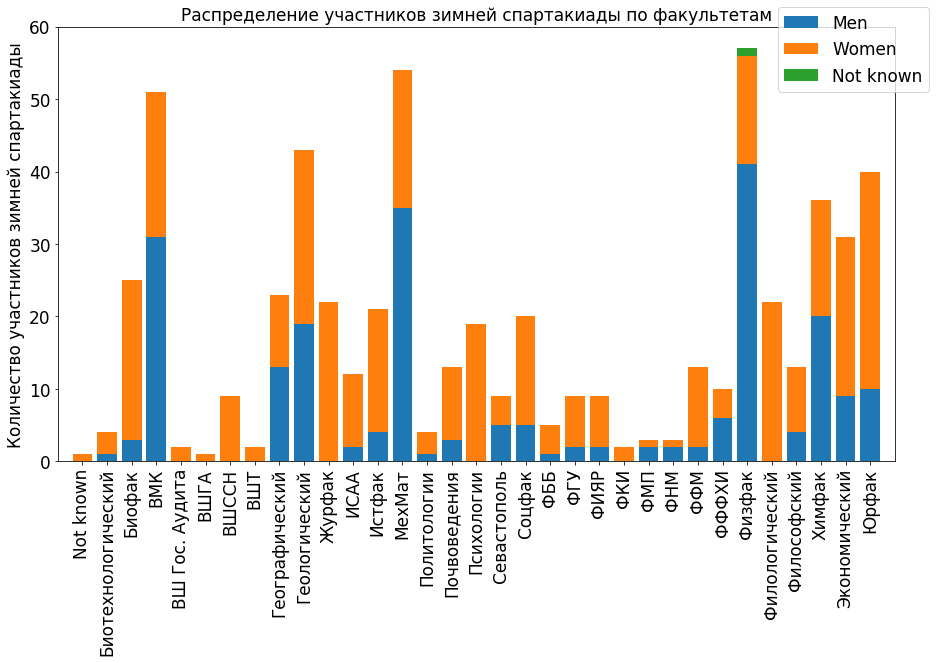

In [37]:
plotter('Распределение участников зимней спартакиады по факультетам', 'Количество участников зимней спартакиады', facts, [-1, 33, 0, 60, 10], 'facts.png')

4 141
6 114
5 107
3 96
2 68
Aспирант 35
1 26
Not known 1
Выпускник 0
Сотрудник 0
10
588
OrderedDict([('1', [7, 19, 0]), ('2', [20, 48, 0]), ('3', [32, 64, 0]), ('4', [55, 86, 0]), ('5', [41, 65, 1]), ('6', [48, 66, 0]), ('Aспирант', [20, 15, 0]), ('Not known', [0, 1, 0])])
8
588


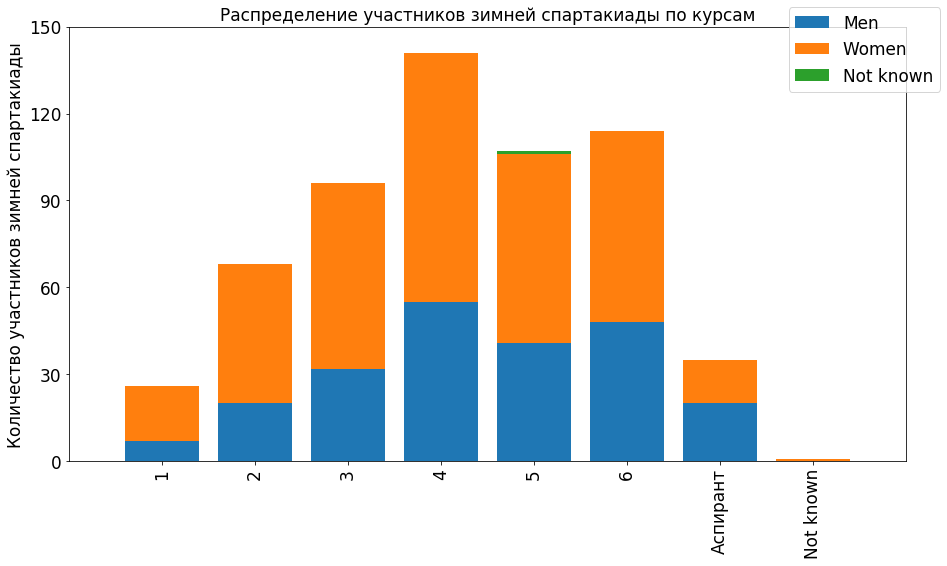

In [38]:
plotter('Распределение участников зимней спартакиады по курсам', 'Количество участников зимней спартакиады', years, [-1, 8, 0, 150, 30], 'years.png')

У-1 171
У-2 162
К-2 149
К-1 141
4
623
OrderedDict([('К-1', [53, 88, 0]), ('К-2', [60, 88, 1]), ('У-1', [58, 113, 0]), ('У-2', [68, 94, 0])])
4
623


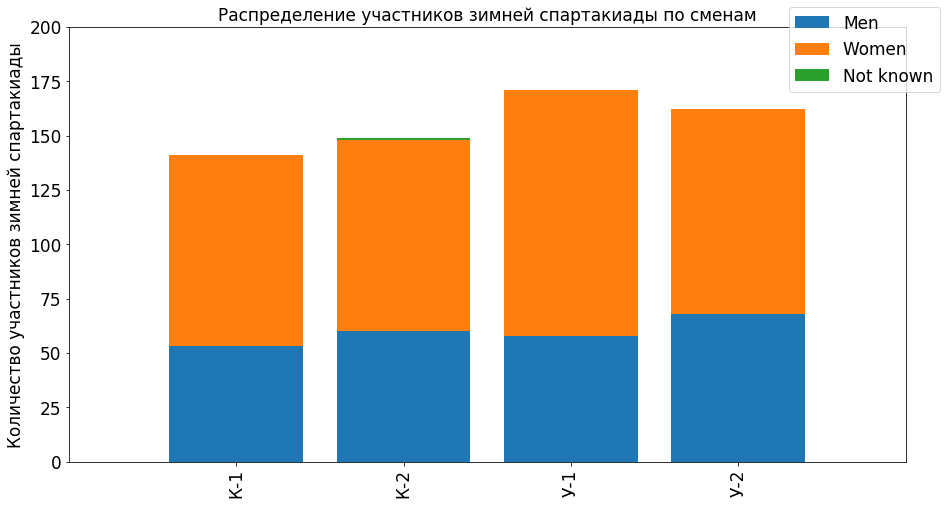

In [39]:
plotter('Распределение участников зимней спартакиады по сменам', 'Количество участников зимней спартакиады', camps, [-1, 4, 0, 200, 25], 'camps.png')